In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
import warnings

# Filter out the specific RuntimeWarning about covariance
warnings.filterwarnings("ignore", category=RuntimeWarning, module="numpy.lib.function_base")


In [6]:
df = pd.read_csv('u.data',names=['user_id','item_id','rating','timestamp'],sep='\t')

In [8]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [10]:
movie_title = pd.read_csv('Movie_Id_Titles')
movie_title

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [11]:
#merge the two data frames
df = pd.merge(df,movie_title,on='item_id')

In [12]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [17]:
movie_mat = pd.pivot_table(df,index = 'user_id',columns='title',values = 'rating')

In [18]:
movie_mat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#sorting movies according to rating and counts
dfmean = df.groupby(by='title')['rating'].mean()
dfcount = df.groupby(by='title')['rating'].count()
final = pd.merge(dfmean,dfcount,on='title')

In [28]:
final['rating']= final['rating_x']
final['count'] = final['rating_y']
final.drop(['rating_x','rating_y'],axis=1,inplace=True)

In [45]:
final['count'].mean()

60.09795673076923

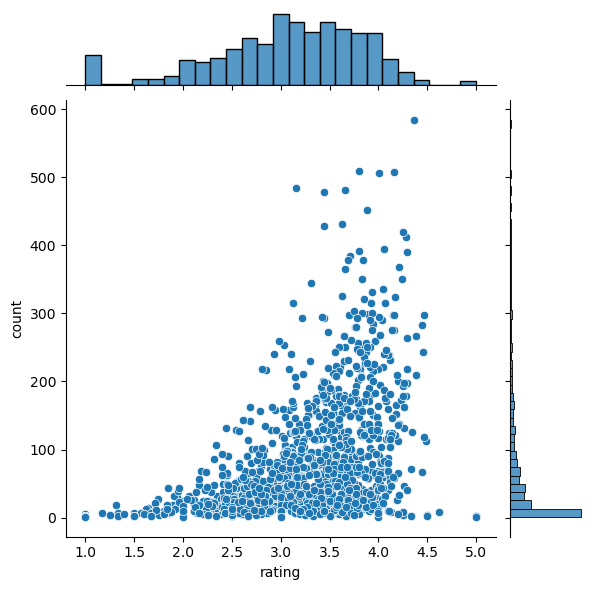

In [71]:
sns.jointplot(x='rating',y='count',data=final)

C:\Users\dines\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


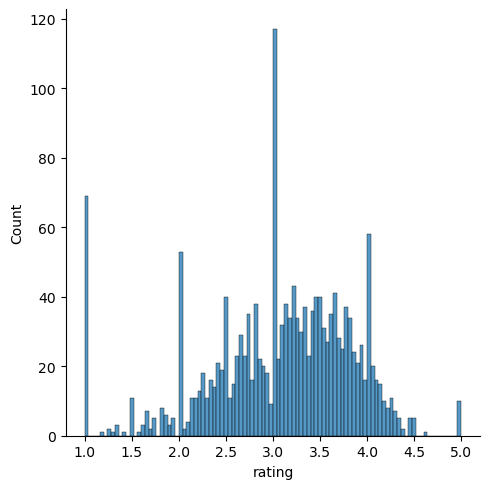

In [72]:
sns.displot(x='rating',data=final,bins=100)

C:\Users\dines\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


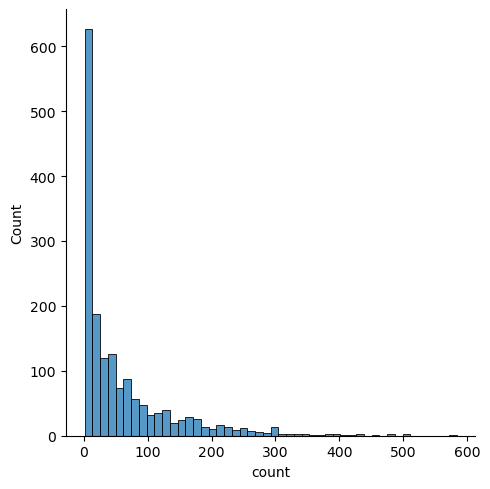

In [73]:
sns.displot(x='count',data=final)

In [60]:
def recommend_func(movie):
    corr_with = movie_mat[movie]
    similar_to = movie_mat.corrwith(corr_with)
    similar_to.dropna(inplace=True)
    movie_recom = pd.DataFrame(similar_to,columns=['Correlation'])
    movie_recom = movie_recom.join(final['count'])
    movie_recom = movie_recom[movie_recom['count']>60]
    movie_recom.reset_index(inplace=True)
    list_movie = list(movie_recom.sort_values(by='Correlation',ascending=False)['title'])
    print("Similar movies are: ")
    for i in range(1,6) :
        print(list_movie[i])


In [70]:
movie = input('Enter movie: ')
recommend_func(movie)

Enter movie: Aliens (1986)
Similar movies are: 
Desperate Measures (1998)
Marvin's Room (1996)
I Know What You Did Last Summer (1997)
Bean (1997)
Anastasia (1997)
